In [5]:
import numpy as np
import pandas as pd
import nltk
import re
import os
import codecs
from sklearn import feature_extraction
import mpld3

In [6]:
topics = ["ml1", "ml2", "ml3", "ml4", "ml5", "ml6", "ml7", "ml8", "ml9", "ml10", "ml11", "ml12", "ml13", "ml14", "ml15", "ml16", "ml17", "ml18", "ml19"]
print "The titles are ", topics

The titles are  ['ml1', 'ml2', 'ml3', 'ml4', 'ml5', 'ml6', 'ml7', 'ml8', 'ml9', 'ml10', 'ml11', 'ml12', 'ml13', 'ml14', 'ml15', 'ml16', 'ml17', 'ml18', 'ml19']


In [7]:
paragraphs=[]
paragraphs.append("Machine learning is a type of artificial intelligence (AI) that provides computers with the ability to learn without being explicitly programmed.")
paragraphs.append("Machine learning focuses on the development of computer programs that can change when exposed to new data.")
paragraphs.append(" The process of machine learning is similar to that of data mining. Both systems search through data to look for patterns.")
paragraphs.append(" However, instead of extracting data for human comprehension -- as is the case in data mining applications -- machine learning uses that data to detect patterns in data and adjust program actions accordingly.")
paragraphs.append("  Machine learning algorithms are often categorized as being supervised or unsupervized. Supervised algorithms can apply what has been learned in the past to new data.")
paragraphs.append("Unsupervised algorithms can draw inferences from datasets.")

paragraphs.append("Machine learning is the subfield of computer science that gives computers the ability to learn without being explicitly programmed. ")
paragraphs.append("Evolved from the study of pattern recognition and computational learning theory in artificial intelligence,[1] machine learning explores the study and construction of algorithms that can learn from and make predictions on data[2] – such algorithms overcome following strictly static program instructions by making data driven predictions or decisions,[3]:2 through building a model from sample inputs.")
paragraphs.append("Machine learning tasks are typically classified into three broad categories, depending on the nature of the learning signal or feedback available to a learning system.")
paragraphs.append(" These are[13]Supervised learning: The computer is presented with example inputs and their desired outputs, given by a teacher, and the goal is to learn a general rule that maps inputs to outputs.")
paragraphs.append("Unsupervised learning: No labels are given to the learning algorithm, leaving it on its own to find structure in its input.")
paragraphs.append(" Unsupervised learning can be a goal in itself (discovering hidden patterns in data) or a means towards an end (feature learning).")

paragraphs.append("Machine learning studies computer algorithms for learning to do stuff. ")
paragraphs.append("We might, forinstance, be interested in learning to complete a task, or to make accurate predictions,or to behave intelligently.")
paragraphs.append(" The learning that is being done is always based on some sortof observations or data, such as examples (the most common case in this course), directexperience, or instruction.")
paragraphs.append(" So in general, machine learning is about learning to do better inthe future based on what was experienced in the past.")

paragraphs.append("Machine learning is an artificial intelligence (AI) discipline geared toward the technological development of human knowledge. ")
paragraphs.append("Machine learning allows computers to handle new situations via analysis, self-training, observation and experience.") 
paragraphs.append("Machine learning facilitates the continuous advancement of computing through exposure to new scenarios, testing and adaptation, while employing pattern and trend detection for improved decisions in subsequent (though not identical) situations.")

print "The paragraphs are ", paragraphs

The paragraphs are  ['Machine learning is a type of artificial intelligence (AI) that provides computers with the ability to learn without being explicitly programmed.', 'Machine learning focuses on the development of computer programs that can change when exposed to new data.', ' The process of machine learning is similar to that of data mining. Both systems search through data to look for patterns.', ' However, instead of extracting data for human comprehension -- as is the case in data mining applications -- machine learning uses that data to detect patterns in data and adjust program actions accordingly.', '  Machine learning algorithms are often categorized as being supervised or unsupervized. Supervised algorithms can apply what has been learned in the past to new data.', 'Unsupervised algorithms can draw inferences from datasets.', 'Machine learning is the subfield of computer science that gives computers the ability to learn without being explicitly programmed. ', 'Evolved from

In [8]:
stopwords = nltk.corpus.stopwords.words('english')
print stopwords

[u'i', u'me', u'my', u'myself', u'we', u'our', u'ours', u'ourselves', u'you', u'your', u'yours', u'yourself', u'yourselves', u'he', u'him', u'his', u'himself', u'she', u'her', u'hers', u'herself', u'it', u'its', u'itself', u'they', u'them', u'their', u'theirs', u'themselves', u'what', u'which', u'who', u'whom', u'this', u'that', u'these', u'those', u'am', u'is', u'are', u'was', u'were', u'be', u'been', u'being', u'have', u'has', u'had', u'having', u'do', u'does', u'did', u'doing', u'a', u'an', u'the', u'and', u'but', u'if', u'or', u'because', u'as', u'until', u'while', u'of', u'at', u'by', u'for', u'with', u'about', u'against', u'between', u'into', u'through', u'during', u'before', u'after', u'above', u'below', u'to', u'from', u'up', u'down', u'in', u'out', u'on', u'off', u'over', u'under', u'again', u'further', u'then', u'once', u'here', u'there', u'when', u'where', u'why', u'how', u'all', u'any', u'both', u'each', u'few', u'more', u'most', u'other', u'some', u'such', u'no', u'nor', u

In [9]:
# Now we want to break a word into its root using a stemmer.
#We use the snowball.
#snowball is better than porter stemmer

from nltk.stem.snowball import SnowballStemmer
stemmer = SnowballStemmer("english")

In [10]:
#First the parageraph is tokenized by sentence then by word
def tokenize(paragraph) :
    tokenList = [word for sentence in nltk.sent_tokenize(paragraph) for word in nltk.word_tokenize(sentence)]
    
    filteredTokens = []
    
    for token in tokenList:
        if re.search('[a-zA-Z]', token):
            filteredTokens.append(token)
    return filteredTokens

#Next step would be to remove the useless tokens. Useless tokens are raw puntuation, numeric tokens, etc.
def stem(filteredTokens) :
    stemList = [stemmer.stem(tok) for tok in filteredTokens]
    return stemList

def tokenizeAndStem(paragraph) :
    tokens = [word for sentence in nltk.sent_tokenize(paragraph) for word in nltk.word_tokenize(sentence)]
    filtered_tokens = []
    for token in tokens:
        if re.search('[a-zA-Z]', token):  #normal regex search
            filtered_tokens.append(token)
    stems = [stemmer.stem(t) for t in filtered_tokens]
    return stems

In [11]:
tokenizedParagraphList = []
stemmedParagraphList = []
for i in paragraphs :
    tokenizedParagraph = tokenize(i)
    tokenizedParagraphList.extend(tokenizedParagraph)
    stemmedParagraphList.extend(stem(tokenizedParagraph))
print tokenizedParagraphList
print stemmedParagraphList

['Machine', 'learning', 'is', 'a', 'type', 'of', 'artificial', 'intelligence', 'AI', 'that', 'provides', 'computers', 'with', 'the', 'ability', 'to', 'learn', 'without', 'being', 'explicitly', 'programmed', 'Machine', 'learning', 'focuses', 'on', 'the', 'development', 'of', 'computer', 'programs', 'that', 'can', 'change', 'when', 'exposed', 'to', 'new', 'data', 'The', 'process', 'of', 'machine', 'learning', 'is', 'similar', 'to', 'that', 'of', 'data', 'mining', 'Both', 'systems', 'search', 'through', 'data', 'to', 'look', 'for', 'patterns', 'However', 'instead', 'of', 'extracting', 'data', 'for', 'human', 'comprehension', 'as', 'is', 'the', 'case', 'in', 'data', 'mining', 'applications', 'machine', 'learning', 'uses', 'that', 'data', 'to', 'detect', 'patterns', 'in', 'data', 'and', 'adjust', 'program', 'actions', 'accordingly', 'Machine', 'learning', 'algorithms', 'are', 'often', 'categorized', 'as', 'being', 'supervised', 'or', 'unsupervized', 'Supervised', 'algorithms', 'can', 'apply

In [12]:
#create a pandas DataFrame with the stemmed vocabulary as the index and the tokenized words as the column.
#The benefit of this is it provides an efficient way to look up a stem and return a full token. 
#The downside here is that stems to tokens are one to many: the stem 'run' could be associated with 'ran', 'runs', 'running', etc.


vocabFrame = pd.DataFrame({'words': tokenizedParagraphList}, index = stemmedParagraphList)
print 'there are ' + str(vocabFrame.shape[0]) + ' items in vocab_frame'

there are 435 items in vocab_frame


In [13]:
#for tfidf, there are two important things, max_df & min_df;
#max_df - When building the vocabulary ignore terms that have a document frequency strictly higher than the given threshold (corpus-specific stop words).
#min_idf - When building the vocabulary ignore terms that have a document frequency strictly lower than the given threshold. This value is also called cut-off in the literature.

#it is very important to tune the parameters for best results - follow the link given below
"http://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.TfidfVectorizer.html"

from sklearn.feature_extraction.text import TfidfVectorizer
tfidfVectorizer = TfidfVectorizer(stop_words='english', use_idf=True, tokenizer=tokenizeAndStem, ngram_range=(1,3))
#Now fit the vectorizer to synopses
%time tfidf_matrix = tfidfVectorizer.fit_transform(paragraphs)
print tfidf_matrix
print tfidfVectorizer.get_feature_names()

CPU times: user 20 ms, sys: 4 ms, total: 24 ms
Wall time: 107 ms
  (0, 353)	0.0830098533262
  (0, 295)	0.128649390276
  (0, 518)	0.202072799672
  (0, 52)	0.159661722465
  (0, 282)	0.146008405178
  (0, 18)	0.177263909891
  (0, 434)	0.202072799672
  (0, 100)	0.110043942903
  (0, 0)	0.177263909891
  (0, 200)	0.177263909891
  (0, 427)	0.134852832684
  (0, 354)	0.0830098533262
  (0, 344)	0.202072799672
  (0, 519)	0.202072799672
  (0, 53)	0.159661722465
  (0, 283)	0.177263909891
  (0, 21)	0.202072799672
  (0, 435)	0.202072799672
  (0, 101)	0.177263909891
  (0, 1)	0.177263909891
  (0, 311)	0.177263909891
  (0, 201)	0.177263909891
  (0, 366)	0.202072799672
  (0, 345)	0.202072799672
  (0, 520)	0.202072799672
  :	:
  (18, 412)	0.138659828994
  (18, 516)	0.138659828994
  (18, 160)	0.138659828994
  (18, 268)	0.138659828994
  (18, 151)	0.138659828994
  (18, 489)	0.138659828994
  (18, 266)	0.138659828994
  (18, 359)	0.138659828994
  (18, 316)	0.138659828994
  (18, 216)	0.138659828994
  (18, 122)	0.1

In [14]:
#Now we calculate the cosine similarity as follows. This will gives us the distance which wil help us in clustering in the later stage.

from sklearn.metrics.pairwise import cosine_similarity
dist = 1 - cosine_similarity(tfidf_matrix)
print dist

[[ -2.22044605e-16   9.44228736e-01   9.75732600e-01   9.72848015e-01
    9.73369106e-01   1.00000000e+00   6.09492488e-01   9.28867093e-01
    9.67714364e-01   9.79321983e-01   9.81869529e-01   9.83974222e-01
    9.41801046e-01   9.68728151e-01   9.92558523e-01   9.68736071e-01
    8.13521572e-01   9.66710362e-01   9.76555530e-01]
 [  9.44228736e-01  -2.22044605e-16   9.46769726e-01   9.34521461e-01
    9.17180652e-01   1.00000000e+00   9.24573912e-01   9.54928388e-01
    9.76663946e-01   9.84331795e-01   9.90342606e-01   9.77282428e-01
    9.50088360e-01   9.95342109e-01   9.82866239e-01   9.75780626e-01
    9.48034032e-01   9.46702368e-01   9.62464755e-01]
 [  9.75732600e-01   9.46769726e-01   7.77156117e-16   8.91553336e-01
    9.52133502e-01   1.00000000e+00   9.73345817e-01   9.44923799e-01
    9.75899217e-01   9.93431024e-01   9.90026131e-01   9.42518464e-01
    9.66722813e-01   9.95189468e-01   9.68703200e-01   9.74986950e-01
    9.80509487e-01   9.80790843e-01   9.72742538e-01

In [18]:
from sklearn.cluster import KMeans

num_clusters = 5

km = KMeans(n_clusters=num_clusters)

%time km.fit(tfidf_matrix)

clusters = km.labels_.tolist()

print clusters

CPU times: user 128 ms, sys: 4 ms, total: 132 ms
Wall time: 127 ms
[4, 2, 1, 1, 2, 2, 4, 3, 3, 2, 2, 1, 2, 3, 1, 2, 4, 0, 0]


In [19]:
from sklearn.externals import joblib

#uncomment the below to save your model 
#since I've already run my model I am loading from the pickle

joblib.dump(km,  'doc_cluster.pkl')

km = joblib.load('doc_cluster.pkl')
clusters = km.labels_.tolist()
print clusters

[4, 2, 1, 1, 2, 2, 4, 3, 3, 2, 2, 1, 2, 3, 1, 2, 4, 0, 0]


In [20]:
#Converting to a pandas da frame.

texts = { 'topics': topics, 'paragraphs': paragraphs, 'cluster': clusters}

frame = pd.DataFrame(texts, index = [clusters] , columns = ['topics', 'cluster'])

print frame

  topics  cluster
4    ml1        4
2    ml2        2
1    ml3        1
1    ml4        1
2    ml5        2
2    ml6        2
4    ml7        4
3    ml8        3
3    ml9        3
2   ml10        2
2   ml11        2
1   ml12        1
2   ml13        2
3   ml14        3
1   ml15        1
2   ml16        2
4   ml17        4
0   ml18        0
0   ml19        0


In [23]:
cluster_colors = {0: '#1b9e77', 1: '#d95f02', 2: '#7570b3', 3: '#e7298a', 4: '#66a61e'}

#set up cluster names using a dict
cluster_names = {0: 'Cluster1', 
                 1: 'Cluster2', 
                 2: 'Cluster3', 
                 3: 'Cluster4', 
                 4: 'Cluter5'}

In [24]:
import os  # for os.path.basename

import matplotlib.pyplot as plt
import matplotlib as mpl

from sklearn.manifold import MDS

MDS()

# convert two components as we're plotting points in a two-dimensional plane
# "precomputed" because we provide a distance matrix
# we will also specify `random_state` so the plot is reproducible.
mds = MDS(n_components=2, dissimilarity="precomputed", random_state=1)

pos = mds.fit_transform(dist)  # shape (n_components, n_samples)

xs, ys = pos[:, 0], pos[:, 1]
print()
print()

()
()


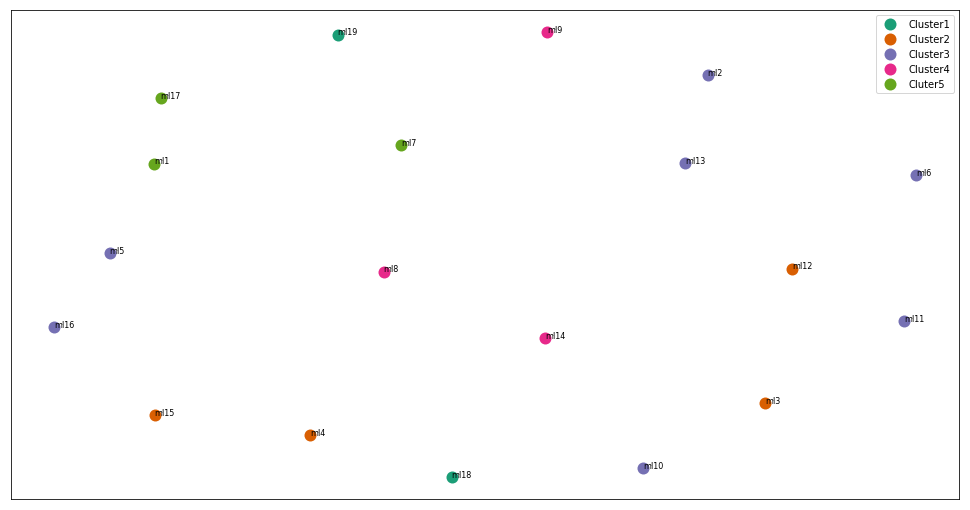

In [26]:
#some ipython magic to show the matplotlib plots inline
%matplotlib inline 

#create data frame that has the result of the MDS plus the cluster numbers and titles
df = pd.DataFrame(dict(x=xs, y=ys, label=clusters, topics=topics)) 

#group by cluster
groups = df.groupby('label')


# set up plot
fig, ax = plt.subplots(figsize=(17, 9)) # set size
ax.margins(0.05) # Optional, just adds 5% padding to the autoscaling

#iterate through groups to layer the plot
#note that I use the cluster_name and cluster_color dicts with the 'name' lookup to return the appropriate color/label
for name, group in groups:
    ax.plot(group.x, group.y, marker='o', linestyle='', ms=12, 
            label=cluster_names[name], color=cluster_colors[name], 
            mec='none')
    ax.set_aspect('auto')
    ax.tick_params(\
        axis= 'x',          # changes apply to the x-axis
        which='both',      # both major and minor ticks are affected
        bottom='off',      # ticks along the bottom edge are off
        top='off',         # ticks along the top edge are off
        labelbottom='off')
    ax.tick_params(\
        axis= 'y',         # changes apply to the y-axis
        which='both',      # both major and minor ticks are affected
        left='off',      # ticks along the bottom edge are off
        top='off',         # ticks along the top edge are off
        labelleft='off')
    
ax.legend(numpoints=1)  #show legend with only 1 point

#add label in x,y position with the label as the film title
for i in range(len(df)):
    ax.text(df.ix[i]['x'], df.ix[i]['y'], df.ix[i]['topics'], size=8)  

    
    
plt.show() #show the plot

#uncomment the below to save the plot if need be
#plt.savefig('clusters_small_noaxes.png', dpi=200)

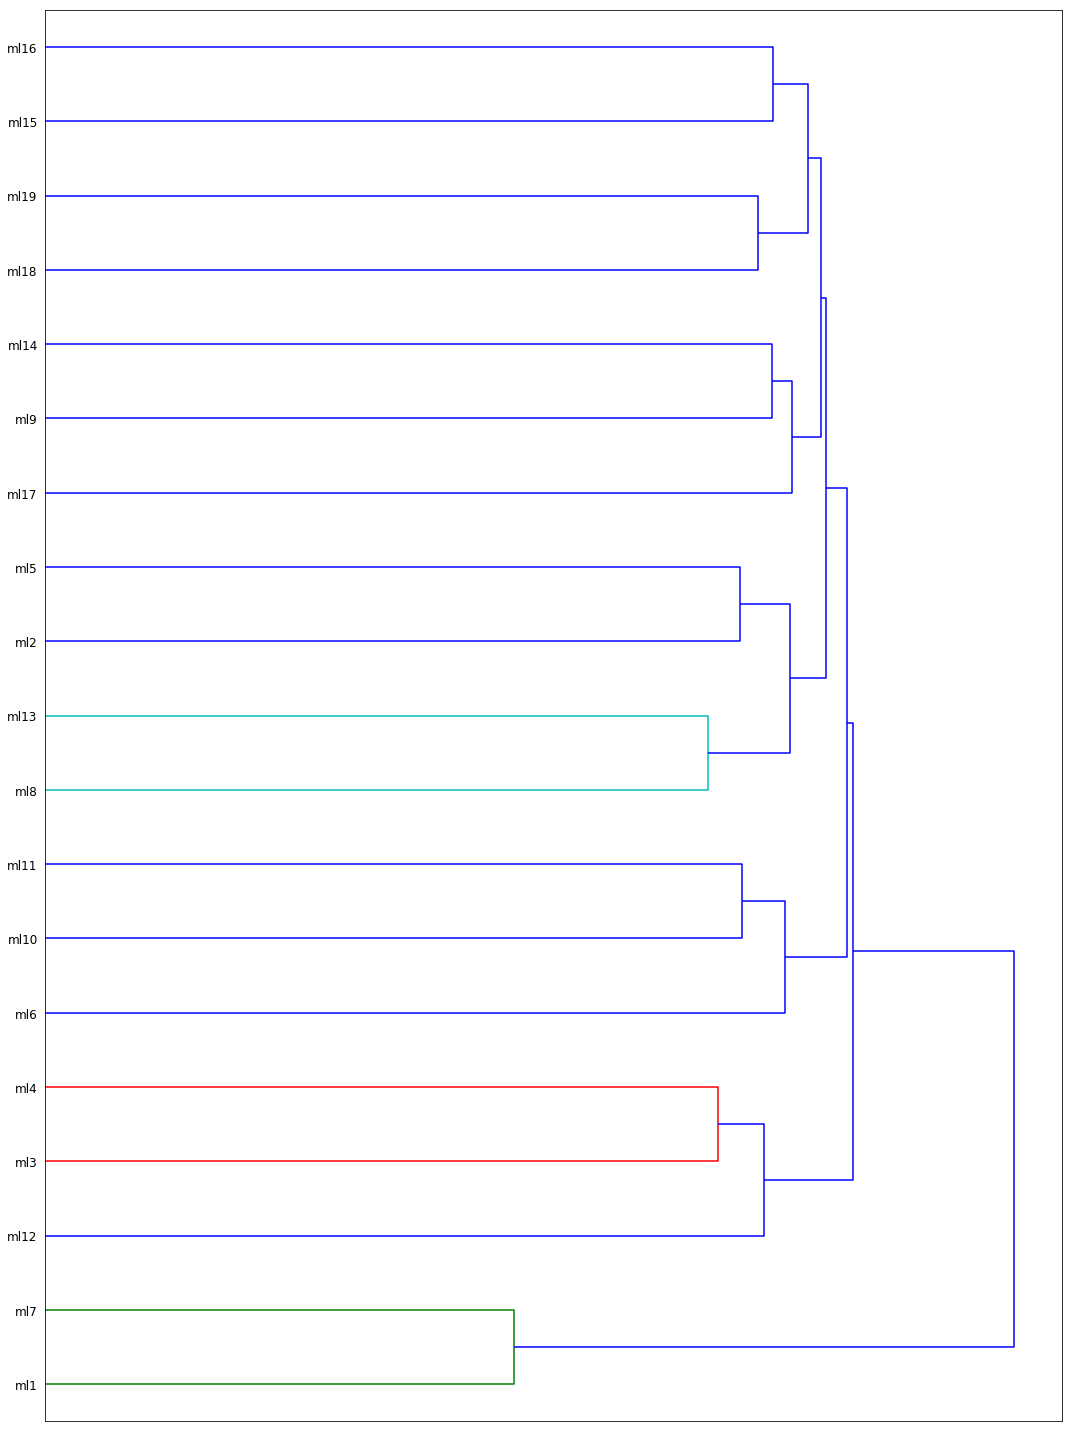

In [28]:
from scipy.cluster.hierarchy import ward, dendrogram

linkage_matrix = ward(dist) #define the linkage_matrix using ward clustering pre-computed distances

fig, ax = plt.subplots(figsize=(15, 20)) # set size
ax = dendrogram(linkage_matrix, orientation="right", labels=topics)

plt.tick_params(\
    axis= 'x',          # changes apply to the x-axis
    which='both',      # both major and minor ticks are affected
    bottom='off',      # ticks along the bottom edge are off
    top='off',         # ticks along the top edge are off
    labelbottom='off')

plt.tight_layout() #show plot with tight layout

#uncomment below to save figure
plt.savefig('ward_clusters.png', dpi=200) #save figure as ward_clusters